# Prediksi Bintik Matahari dengan Menggunakan Metode SARIMA dan ARIMA

## authors
*Edit Name, ID, GitHub username, and in charge activity for your team. (Point: 5)*

No | Name | ID | GitHub username | In charge activity
:-: | :- | :-: | :- | :-
1 | Muhammad Azfa Mukhlis | 10223036 | [AzfaMkh](https://github.com/AzfaMkh) | Discussion on GitHub issues
2 | Hairil Aulia | 10223087 | [Hairil-A](https://github.com/Hairil-A) | Notebook finalization
3 | Ikbar Fauzul Mubin Ruhimat | 10223083 | [IkbarRuhimat83](https://github.com/IkbarRuhimat83) | Slide on OSF
4 | Angel Betesda Silaban | 10223031 | [Angelsan-17](https://github.com/Angelsan-17) | YouTube presenation video

## abstract
Bintik hitam atau Sunspot adalah area gelap di permukaan matahari (fotosfer) akibat aktivitas magnetik yang intens. Prediksi jumlah bintik matahari menjadi penting untuk memahami siklus matahari dan dampaknya terhadap teknologi komunikasi serta navigasi satelit.
Dalam penelitian ini, kami menggunakan metode SARIMA (Seasonal Autoregressive Integrated Moving Average) dan ARIMA (Autoregressive Integrated Moving Average) untuk memprediksi jumlah kemunculan bintik matahari. Penelitian ini diharapkan dapat menentukan metode mana yang lebih cocok digunakan untuk memprediksi bintik hitam matahari.

Kata kunci: Bintik matahari, Sunspot, SARIMA, ARIMA

## background
Penelitian ini bertujuan untuk mencari metode mana yang lebih sesuai untuk memprediksi jumlah bintik hitam antara metode SARIMA dan ARIMA. Dengan membandingkan kedua metode tersebut kita dapat menemukan metode yang lebih akurat dan sesuai dengan kenyataan untuk memprediksi jumlah bintik matahari. Terdapat penelitian yang serupa dengan penelitian ini yaitu penelitian Perbandingan Metode ARIMA dengan RBFNN dalam Peramalan Rata-Rata Banyaknya Bilangan Sunspot yang dilakukan oleh M. A. Zufar [4], dan berikut adalah data dari hasil penelitian tersebut. Dengan hasil penelitian menunjukkan bahwa metode RBFNN lebih cocok digunakan untuk memprediksi rata-rata banyaknya bilangan sunspot.

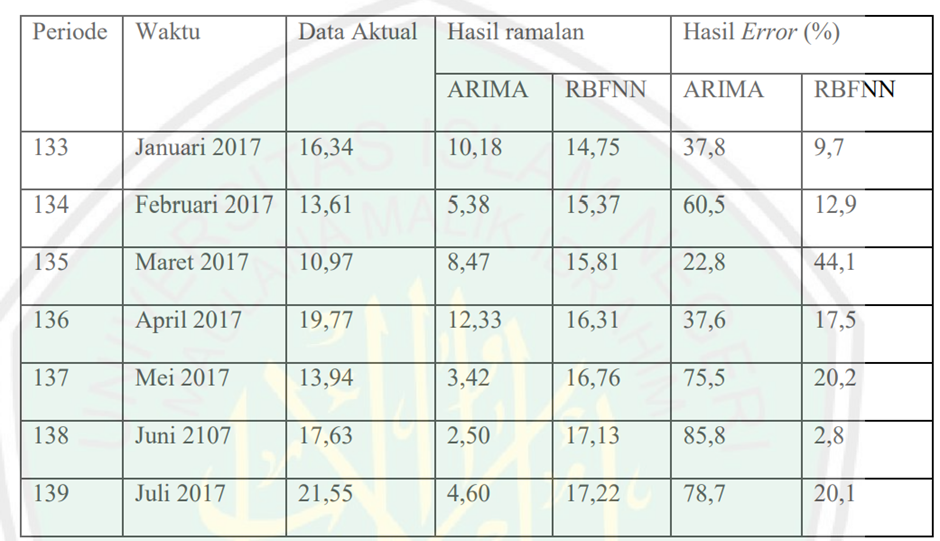

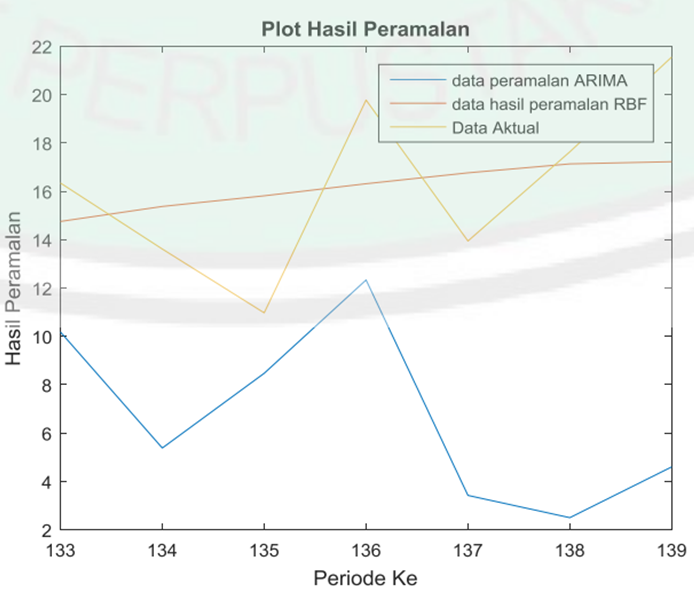

Selain itu terdapat juga penelitian lainnya yang serupa seperti Prediksi Bilangan Sunspot menggunakan Support Vector Regression (SVR) oleh S. Suswanto [7], Pengelompokkan Sunspot pada Citra Matahari dengan Menggunakan K-Means Clustering oleh D. Hasanah [1], dan Estimator Kernel Epanechnikov dan Kernel Triangle pada Data Rata-Rata Bulanan Bilangan Sunspot, NOAA oleh S. Nisa' [2]. 

## method

### Flowchart

![FlowChart.png](<attachment:FlowChart.png>)
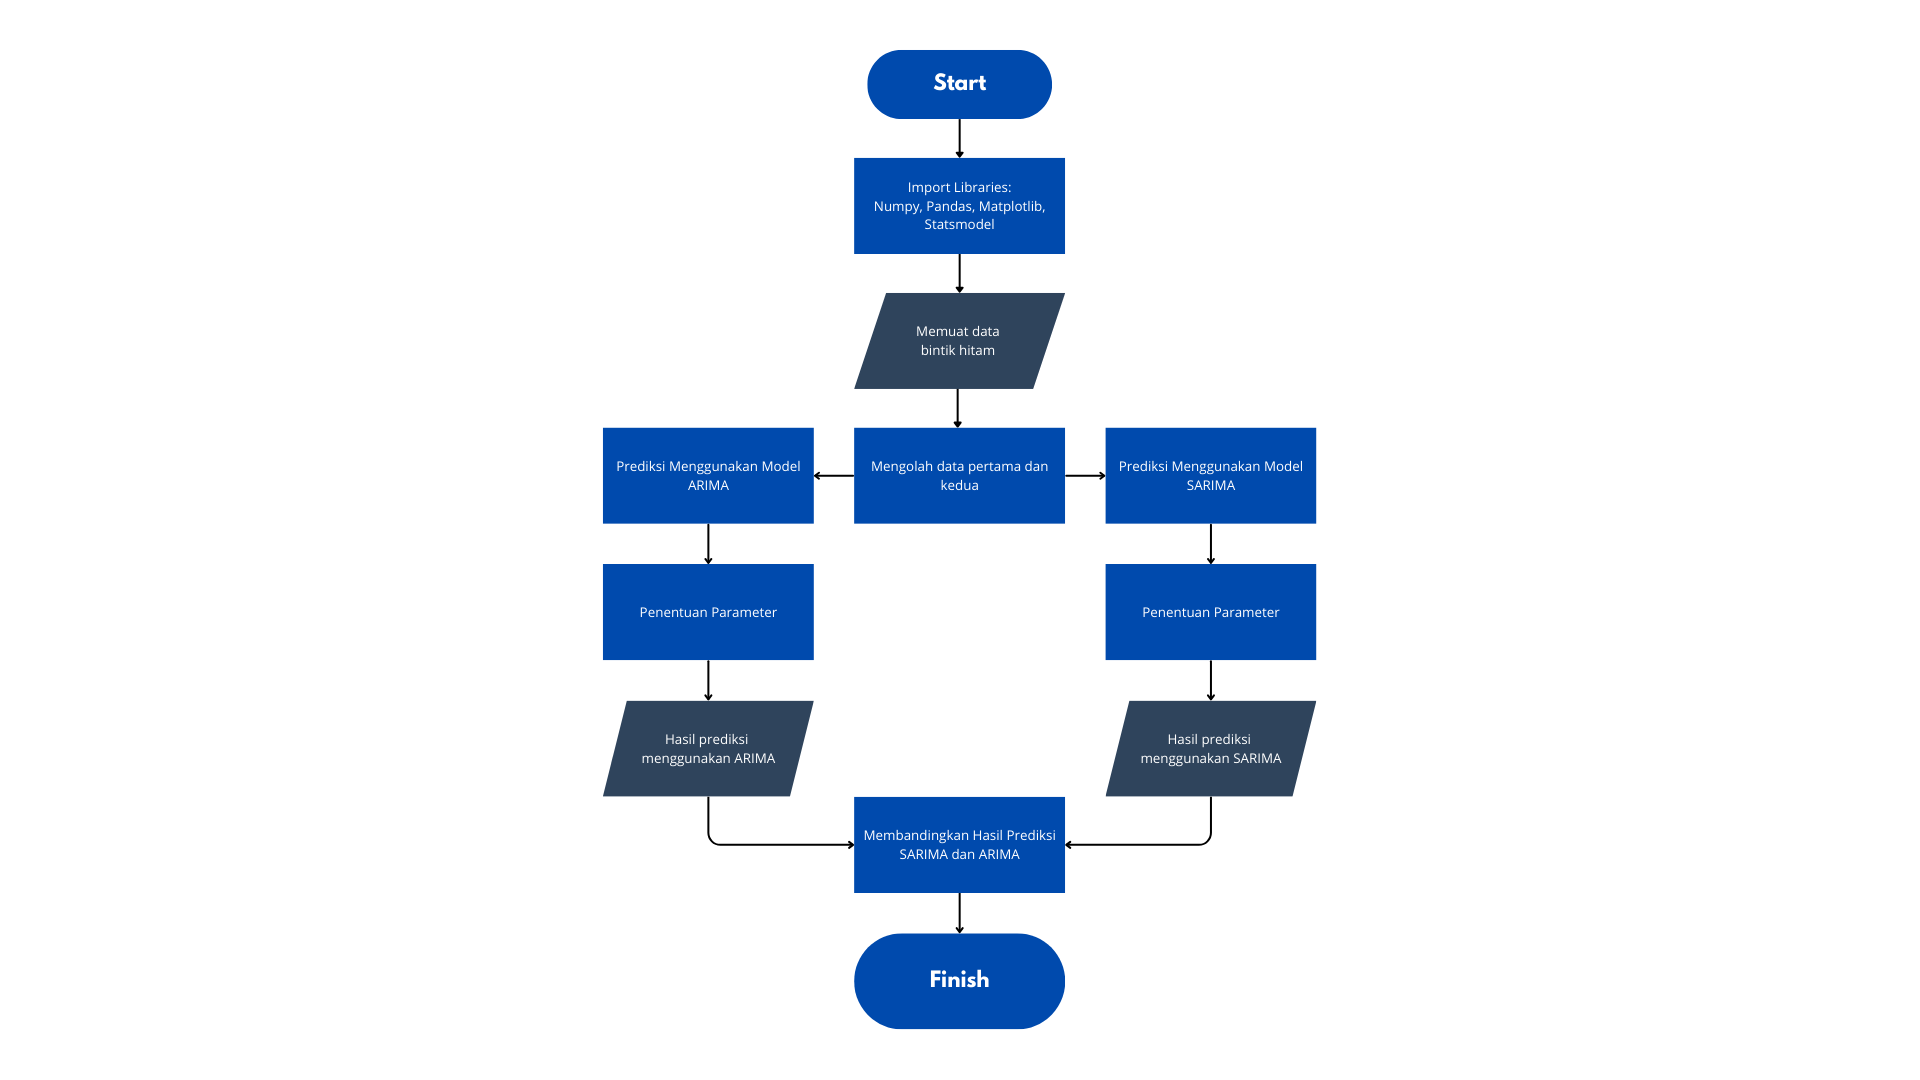

In [10]:
# Import 
import numpy as np
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-notebook')
plt.rcParams['figure.figsize'] = [16, 9]
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from timeit import default_timer as timers
from statsmodels.tsa.arima.model import ARIMA

### Pengolahan Data Pertama
Mengolah data pengamatan bintik matahari sehingga bisa ditampilkan sebagai deret waktu.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_18268\3290285901.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sunspots'].interpolate(method='linear', inplace=True)


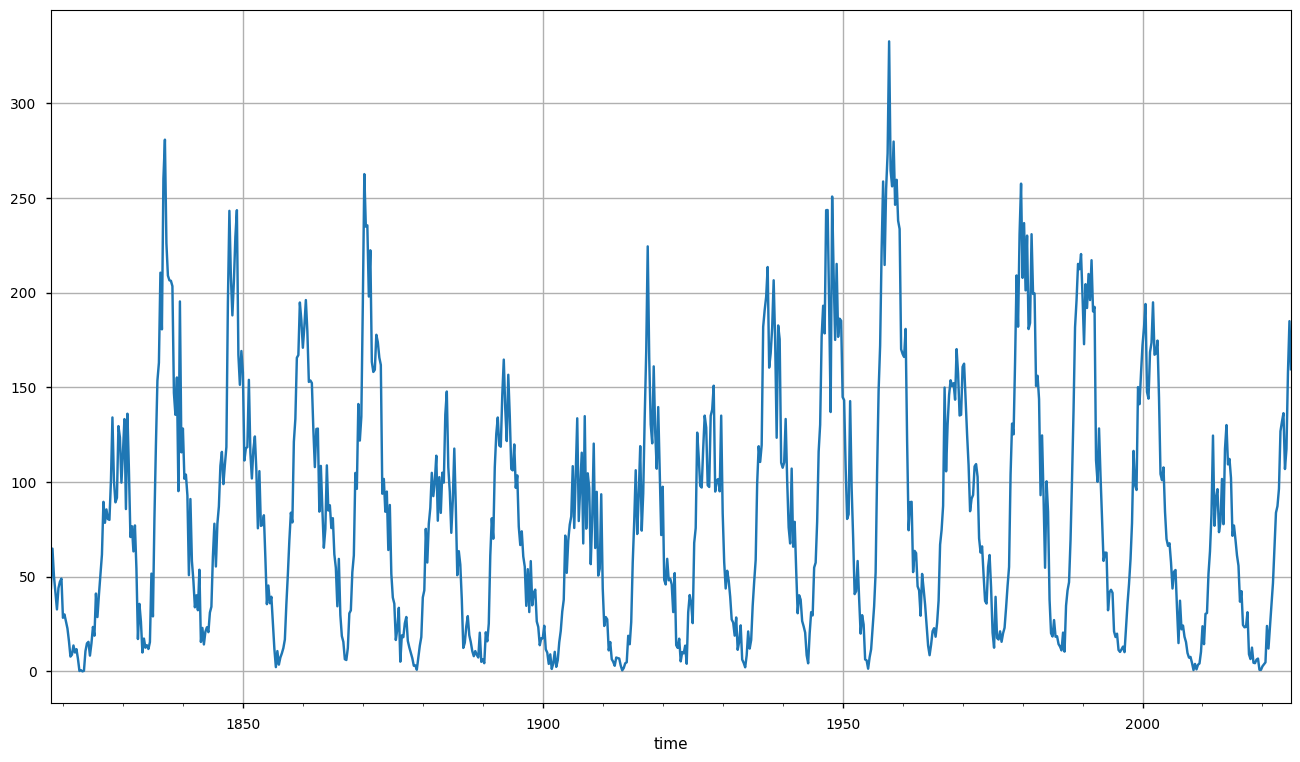

In [16]:
# Membaca data dan membuat dataframe pertama
df = pd.read_csv(r"C:\Users\VICTUS\OneDrive - Institut Teknologi Bandung\PGDA\RBL\SN_d_tot_V2.0.csv",
                delimiter=';', na_values=['-1'])
df.columns = ['year', 'month', 'day', 'fraction','sunspots', 'sdt', 'obs','indicator']

# Membuat kolom baru bernama 'time'
df['time']=pd.to_datetime(df[['year', 'month', 'day']])
# Kolom 'time' menjadi indeks dari dataframe
df.index = df['time']
# Mengganti nilai Nan dengan interpolasi linear
df['sunspots'].interpolate(method='linear', inplace=True)

# Mengubah frekuensi data menjadi seperempat tahun
ts = pd.Series(data=df.sunspots, index=df.index)
ts_month = ts.resample('MS').mean()
ts_quarter = ts.resample('QE').mean()

# Menampilkan data deret waktu
ts_quarter.plot()
plt.grid()
plt.show()

### Pengolahan Data Kedua
Memotong data pertama menjadi setengah, kemudian mengolahnya sehingga bisa ditampilkan sebagai deret waktu.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_18268\3659319290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time']=pd.to_datetime(df2[['year', 'month', 'day']])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_18268\3659319290.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d

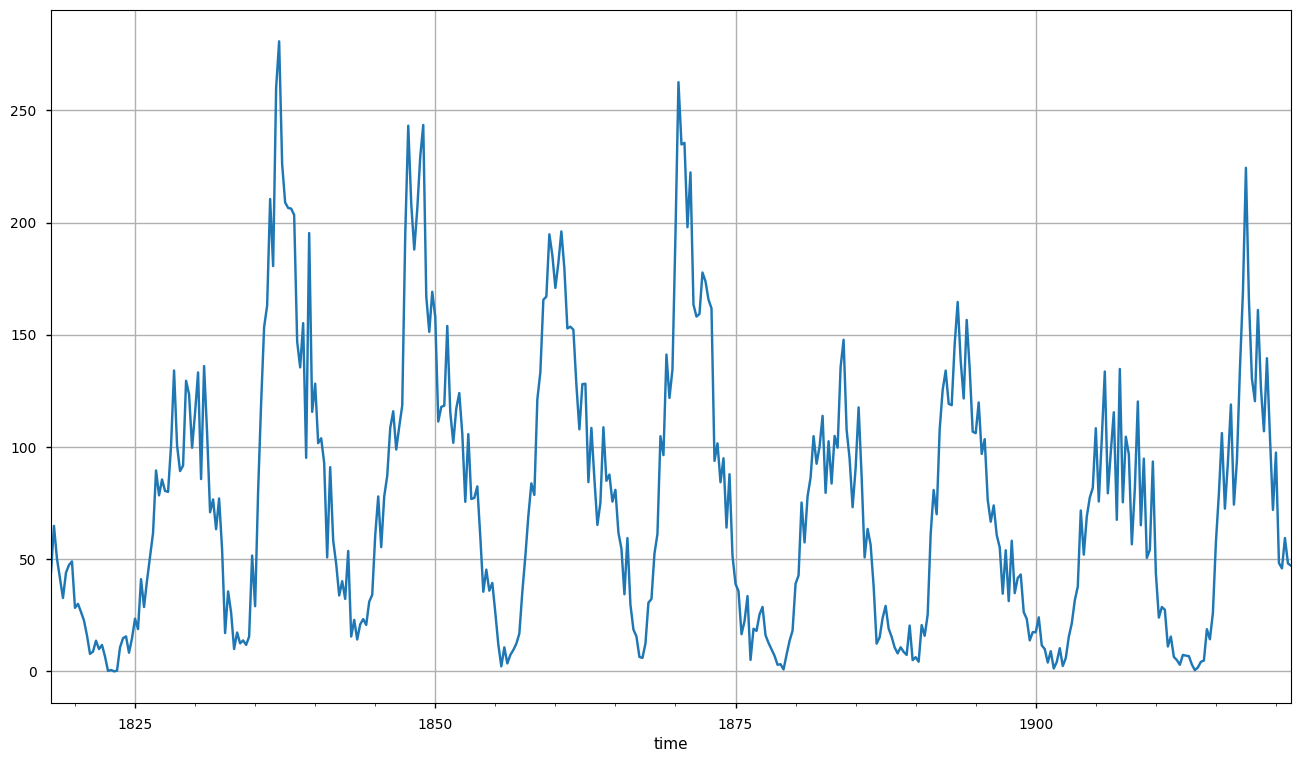

In [17]:
# Memotong data menjadi dua  
tengah = len(df) // 2
df2 = df.iloc[:tengah]

# Menambah kolom 'time' 
df2['time']=pd.to_datetime(df2[['year', 'month', 'day']])
# Kolom waktu sebagai indeks dari df2
df2.index = df2['time']
# Mengganti nilai Nan dengan interpolasi linear
df2['sunspots'].interpolate(method='linear', inplace=True)

# Resample menjadi frekuensi seperempat tahun
ts2 = pd.Series(data=df2.sunspots, index=df2.index)
ts_month2 = ts2.resample('MS').mean()
ts_quarter2 = ts2.resample('QE').mean()

# Menampilkan data deret waktu
ts_quarter2.plot()
plt.grid()
plt.show()

### Prediksi Sunspot Menggunakan SARIMA

#### Penentuan Parameter untuk Analisis SARIMA 

1. Parameter AR (p)

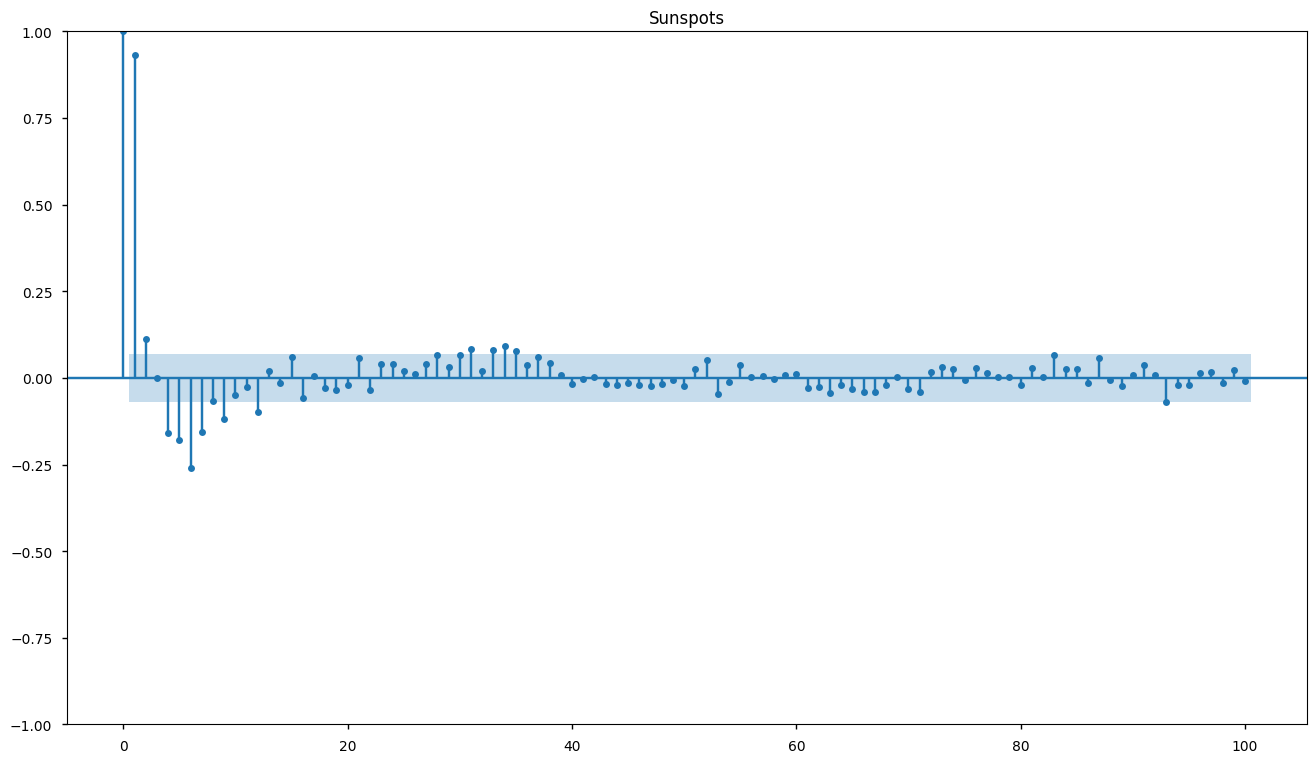

In [18]:
plot_pacf(ts_quarter,lags=100,title='Sunspots')
plt.show()

Nilai p dapat ditentukan dengan menghitung banyaknya *lag* awal yang berada di atas nilai signifikan. Dari plot PACF di atas, didapat bahwa p = 3


2. Parameter MA (q)

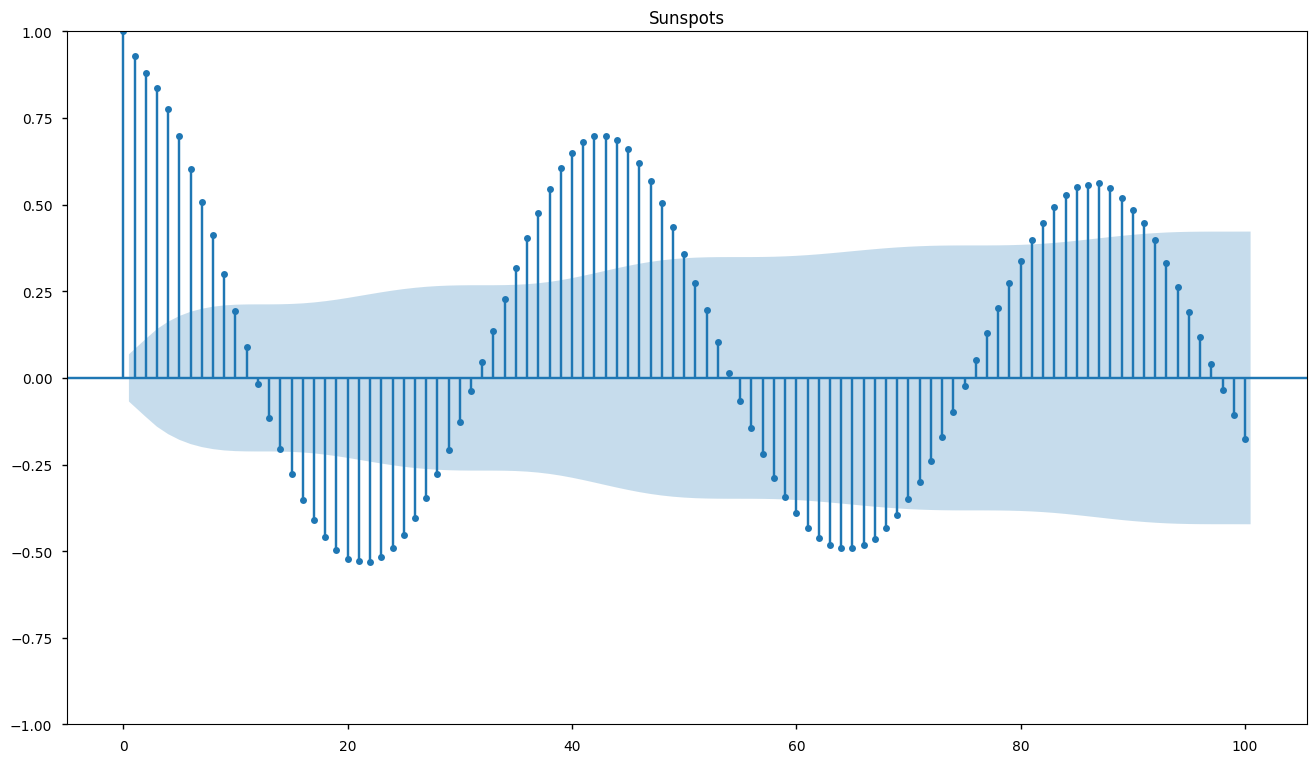

In [ ]:
plot_acf(ts_quarter,lags=100,title='Sunspots')
plt.show()

Nilai 1 dapat ditentukan dengan menghitung banyaknya *lag* yang berada di atas titik error. Dari plot PACF di atas, didapat bahwa q = 10

3. Parameter I (d)

In [19]:
from statsmodels.tsa.stattools import adfuller
def printADFTest(serie):
    result = adfuller(serie, autolag='AIC')
    print("ADF Statistic %F" % (result[0]))
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print('\n')

#d = 0
printADFTest(ts_quarter)

ADF Statistic -9.956083
p-value: 2.4421861002805168e-17
Critial Values:
   1%, -3.4383892038884722
Critial Values:
   5%, -2.8650884667384955
Critial Values:
   10%, -2.568659512747501




Parameter d, differencing, dicari menggunakan uji ADF dengan hasil seperti di atas. Karena nilai ADF Statistic kurang dari semua critical values, dan karena p-value juga kurang dari 0.05, maka dapat disimpulkan bahwa data tersebut stasioner (d = 0).

- Menentukan nilai periode musiman (S)\
Terlihat pada plot PACF, bentuk perulangan data berulang pada lag ke-43, sehingga S = 43.

- Menentukan nilai D\
D=1 jika data deret waktu memiliki pola musiman yang stabil, D=0 untuk selainnya, dan d+D≤2. 
Sehingga, karena bintik matahari adalah fenomena musiman, D=1.

- Menentukan orde suku AR musiman\
P≥1 jika plot PACF positif saat lag ke-S, else P=0 jika selainnya, dan P+Q≤2. Sehingga P=1

- Menentukan orde suku MA musiman \
Q≥1 jika plot PACF negatif  pada lag ke-S, selainnya Q=0, dan P+Q≤2. Sehingga Q=0.

#### Hasil Prediksi menggunakan SARIMA

In [20]:
hasil = sm.tsa.statespace.SARIMAX(ts_quarter2, trend='n', order=(3,0,10), seasonal_order=(1,1,0,43))
hasil = hasil.fit()
print(hasil.summary())

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                             sunspots   No. Observations:                  414
Model:             SARIMAX(3, 0, 10)x(1, 1, [], 43)   Log Likelihood               -1738.123
Date:                              Sun, 22 Dec 2024   AIC                           3506.245
Time:                                      18:13:20   BIC                           3564.988
Sample:                                  03-31-1818   HQIC                          3529.576
                                       - 06-30-1921                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6622      0.748      0.885      0.376      -0.804       2.129
ar.L2          0.77

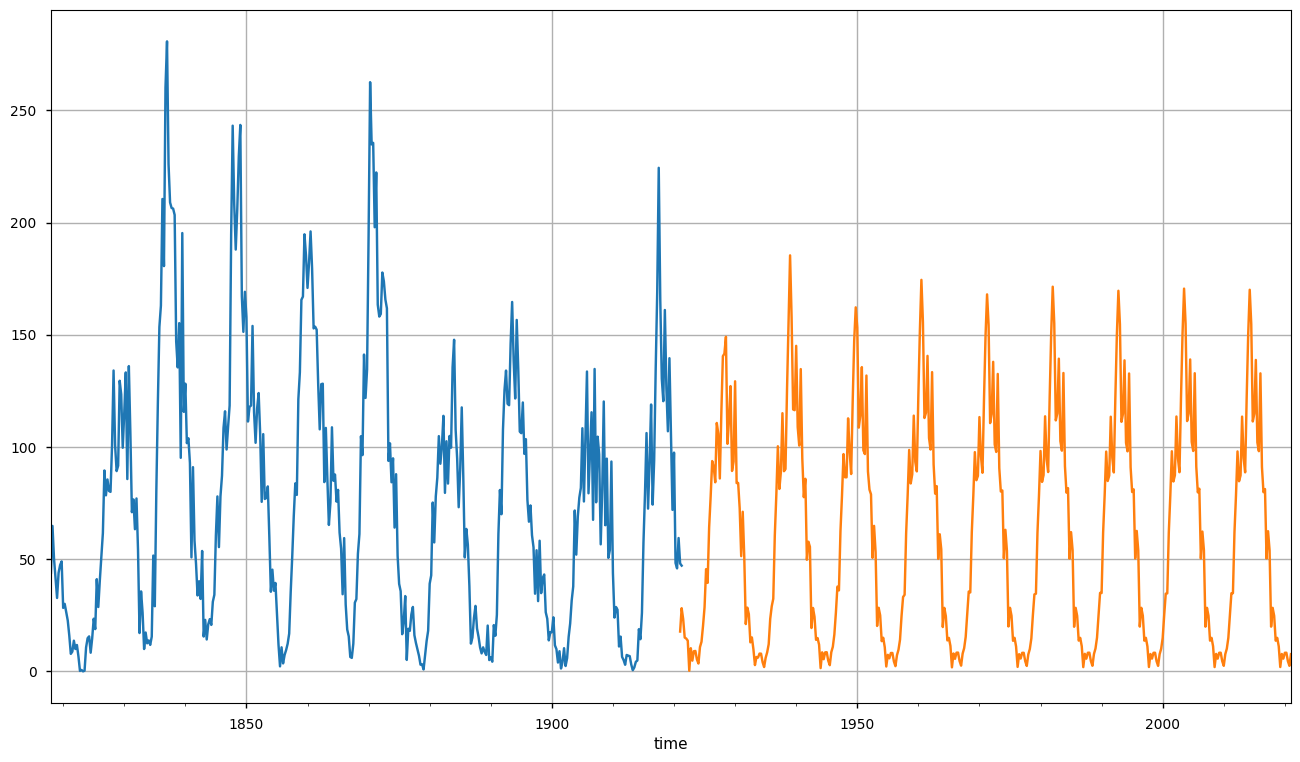

In [21]:
prediksi = hasil.predict(start = ts_quarter2.index[-2], end= ts_quarter2.index[-2] + pd.DateOffset(months=1200), dynamic= True) 
ts_quarter2.plot()
prediksi.plot()
plt.grid()
plt.show()

### Prediksi menggunakan model ARIMA


#### Penentuan Parameter untuk Analisis ARIMA 
Model ARIMA adalah model SARIMA yang menghilangkan bagian seasonality atau musiman pada data yang diperoleh. Sehingga, parameter-parameter s, p, dan d pada SARIMA dapat digunakan pada model ini. Dengan demikian, diperoleh hasil prediksi sebagai berikut,


In [22]:
hasil2 = ARIMA(ts_quarter2, order=(3, 0, 10))
hasil2 = hasil2.fit()

# Summary of the model
print(hasil2.summary())

                               SARIMAX Results                                
Dep. Variable:               sunspots   No. Observations:                  414
Model:                ARIMA(3, 0, 10)   Log Likelihood               -1854.812
Date:                Sun, 22 Dec 2024   AIC                           3739.624
Time:                        18:15:07   BIC                           3800.012
Sample:                    03-31-1818   HQIC                          3763.506
                         - 06-30-1921                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.5761      8.756      8.746      0.000      59.415      93.737
ar.L1          1.0102      0.099     10.170      0.000       0.816       1.205
ar.L2          0.7489      0.183      4.094      0.0

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


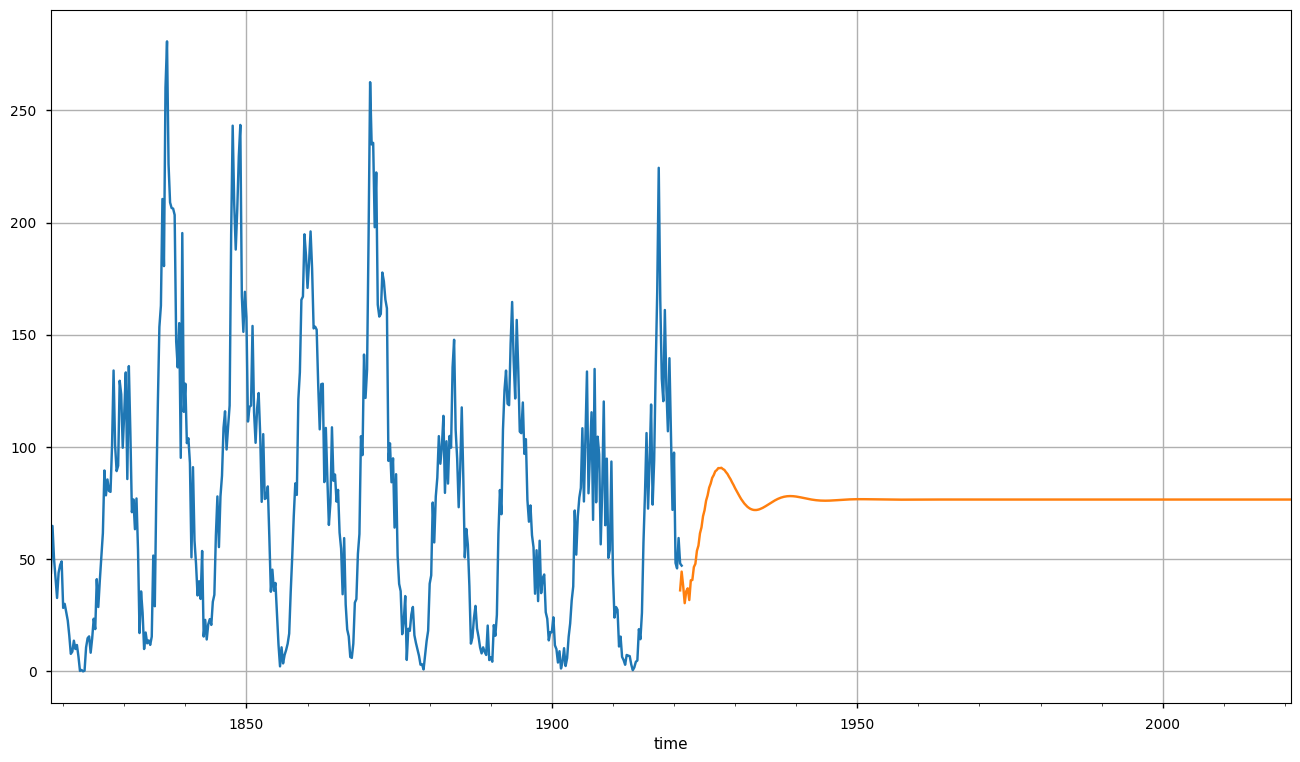

In [23]:
prediksi2 = hasil2.predict(start = ts_quarter2.index[-2], end= ts_quarter2.index[-2] + pd.DateOffset(months=1200), dynamic= True) 
ts_quarter2.plot()
prediksi2.plot()
plt.grid()
plt.show()

### Dependencies

#### Platform

Windows, MacOS

#### Software

Visual Studio Code, Jupyter Notebook

#### Language

Python

#### Libraries

1. Numpy
2. Pandas
3. Matplotlib
4. Statsmodel

## results and dicussion

Model ARIMA (AutoRegressive Integrated Moving Average) dan SARIMA (Seasonal ARIMA) memiliki perbedaan utama dalam kemampuannya menangani pola musiman. ARIMA dirancang untuk menganalisis dan memprediksi data deret waktu tanpa pola musiman. Model ini lebih sederhana karena hanya melibatkan tiga parameter utama, yaitu \(p\) (orde AR), \(d\) (orde differencing), dan \(q\) (orde MA). Kelebihan ARIMA adalah kemudahannya dalam penerapan pada data yang tidak memiliki pola musiman. Namun, model ini memiliki kelemahan ketika diterapkan pada data musiman, karena tidak dapat menangkap pola yang berulang secara periodik.

Sebaliknya, SARIMA adalah perpanjangan ARIMA yang dirancang untuk mengakomodasi pola musiman dengan menambahkan parameter musiman, yaitu \(P\), \(D\), \(Q\), dan \(m\), di mana \(m\) adalah panjang periode musiman. Kelebihan SARIMA terletak pada kemampuannya untuk menangani data yang memiliki pola musiman dengan baik, seperti penjualan musiman atau data cuaca tahunan. Namun, SARIMA lebih kompleks dibandingkan ARIMA karena melibatkan lebih banyak parameter, sehingga proses identifikasi dan estimasi model membutuhkan lebih banyak waktu dan keahlian.

Secara umum, ARIMA cocok untuk data tanpa pola musiman, sedangkan SARIMA sangat ideal untuk data dengan pola musiman yang jelas. Pemilihan model bergantung pada karakteristik data: jika data tidak menunjukkan pola musiman, ARIMA lebih efisien; namun, jika pola musiman dominan, SARIMA memberikan hasil yang lebih akurat.

Jika dibandingkan dengan data asli yang diperoleh lewat pengamatan, tentu ada error yang cukup besar apalagi ketika jangka waktunya cukup panjang. Model SARIMA menghasilkan grafik yang menunjukkan pola musiman yang sesuai, yaitu dengan periode 11 tahun sebagaimana bintik matahari. Namun, prediksi yang dihasilkan menghasilkan titik-titik yang mirip dengan periode sebelumnya, tidak mencerminkan ketidakpastian dan keacakan tertentu yang terlihat pada data asli. Setidaknya, metode SARIMA masih memberikan hasil yang cukup baik ketika hanya memprediksi pada satu periode siklus saja, lebih dari itu maka modelnya akan men-train dari data hasil prediksi sendiri, sehingga hasilnya akan cukup jauh dari realita.

Di sisi lain, model ARIMA benar-benar memberikan hasil yang jauh dari kenyataan. Memang telah disebutkan apabila ARIMA tidak dapat menangkap pola musiman yang muncul pada data, namun setidaknya untuk periode waktu yang singkat, ARIMA masih dapat memberikan prediksi yang cukup baik. Setelahnya, ARIMA hanya fokus pada hubungan linear antara titik data yang bersesuaian dan mengabaikan pola musimannya. Akibatnya, setelah beberapa langkah berlalu, hasil prediksi ARIMA akan cenderung menuju rata-rata data. 

## conclusion

Untuk data bintik hitam ini metode SARIMA lebih cocok digunakan, karena data jumlah bintik hitam adalah data dengan pola musiman dan metode SARIMA cocok untuk memprediksi data dengan pola musiman.
Yang membedakan penelitian ini dari penelitian lainnya adalah kami membandingkan  metode SARIMA dan ARIMA. Sedangkan di penelitian sebelumnya membandingkan metode ARIMA dengan RBFNN. Berikut saran ide dari kami untuk penelitian selanjutnya “Penentuan parameter SARIMA secara otomatis menggunakan grid search”, “Menentukan nilai nilai error antara hasil prediksi SARIMA dan ARIMA dengan data aktual”, “Menentukan titik kritis Ketika model ARIMA collapse”.

## references

[1] D. Hasanah, R. A, "Pengelompokkan Sunspot pada Citra Matahari dengan Menggunakan K-Means Clustering," MathVisioN, vol. 01, no. 02, pp. 72-78, 2019, [Online]. Available: url:http://journal.unirow.ac.id/index.php/mv.

[2] S. Nisa', Estimator Kernel Epanechnikov dan Kernel Triangle pada Data Rata-Rata Bulanan Bilangan Sunspot, NOAA. Undergraduate [thesis]. Malang: Universitas Islam Negeri Maulana Malik Ibrahim, 2016. [Online]. Available: http://etheses.uin- malang.ac.id/2895/.

[3] G. S. Budhi, R. Adipranata, M. Sugiarto, B. Anwar, and B. Setiahadi, "Pengelompokan Sunspot Pada Citra Digital Mahatari Menggunakan Metode Clustering Dbscan," 1 Semin. Nas. Apl. Teknol. Inf. 2011, vol. 2011, no. Snati, pp. 17-18, 2011, [Online]. Available: https://www.neliti.com/publications/176344/pengelompokan-sunspot-pada-citra-digital-mahatari-menggunakan-metode-clustering 

[4] M. A. Zufar, Perbandingan Metode ARIMA dengan RBFNN dalam Peramalan Rata-Rata Banyaknya Bilangan Sunspot. Undergraduate [thesis]. Malang: Universitas Islam Negeri Maulana Malik Ibrahim, 2018. [Online]. Available: http://etheses.uin-malang.ac.id/13954/.

[5] Y. Monita, D. C. R. Novitasari, N. Widodo, and A. Z. Arifin, "Penggunaan Metode Backpropagation Untuk Peramalan Jumlah Ledakan Matahari (Flare)," MathVisioN, vol. 1, no. 02, pp. 67-71, 2019, [Online]. Available: url:http://journal.unirow.ac.id/index.php/mv.

[6] U. Yus'an and E. Puspitaningrum, "Mendeteksi Aktivitas Matahari dengan Mengamati Evolusi Plage dan Sunspot Menggunakan Software Kesehatan," Media Dirgant., vol. 9, no. 4, 2014, [Online]. Available:
https://majalah.lapan.go.id/index.php/md/article/download/245/232.

[7] S. Suwanto, Prediksi Bilangan Sunspot menggunakan Support Vector Regression (SVR). Undergraduate [thesis]. Surabaya: Universitas Islam Negeri Sunan Ampel, 2019. [Online]. Available: http://digilib.uinsby.ac.id/id/eprint/38114.

[8] W. E. Cahyono, “Dampak Aktivitas Matahari Terhadap Kenaikan Temperatur Global,” J. Ber. Dirgant., vol. 11, no. 1, pp. 1–5, 2010, [Online]. Available: http://jurnal.lapan.go.id/index.php/berita_dirgantara/article/view/1159.

[9] A. Lusiani, “Pemodelan Autoregressive Integrated Moving Average (ARIMA) Curah Hujan Di Kota Bandung,” Sigma-Mu, vol. 3, pp. 9–25, 2011, [Online]. Available: https://jurnal.polban.ac.id/sigmamu/article/view/874.

[10] B. A. Marzouk, “Statistical method to predict the sunspots number,” NRIAG J. Astron. Geophys., vol. 7, no. 2, pp. 175–179, 2018, [Online]. Available: https://doi.org/10.1016/j.nrjag.2018.08.001.

[11] P. G. Zhang, “Time series forecasting using a hybrid ARIMA and neural network model,” in Neurocomputing, 2003, vol. 50, pp. 159–175. doi: 10.1016/S0925-2312(01)00702-0.

[12] K. B. Tadesse and M. O. Dinka, “Application of SARIMA model to forecasting monthly flows in Waterval River, South Africa,” J. Water L. Dev., vol. 35, no. 1, pp. 229–236, 2017, doi: 10.1515/jwld-2017-0088.

[13] A. Cyril, R. H. Mulangi, and V. George, “Modelling and Forecasting Bus Passenger Demand using Time Series Method,” 2018 7th Int. Conf. Reliab. Infocom Technol. Optim. Trends Futur. Dir. ICRITO 2018, vol. 58, pp. 460–466, 2018, doi: 10.1109/ICRITO.2018.8748443.

[14] M. Ekananda, Analisis Data Time Series, 1st ed. Jawa Barat: Mitra Wacana Media, 2014.

[15] Z. Li, J. Bi, and Z. Li, “Passenger Flow Forecasting Research for Airport Terminal Based on SARIMA Time Series Model,” 2017. doi: 10.1088/1755-1315/100/1/012146.

[16] S. Noureen, S. Atique, V. Roy, and S. Bayne, “Analysis and application of seasonal ARIMA model in Energy Demand Forecasting: A case study of small scale agricultural load,” Midwest Symp. Circuits Syst., vol. 2019-Augus, pp. 521–524, 2019, doi: 10.1109/MWSCAS.2019.8885349.
